In [1]:
import argparse
import glob
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
        if len(X) > 120:
            break
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


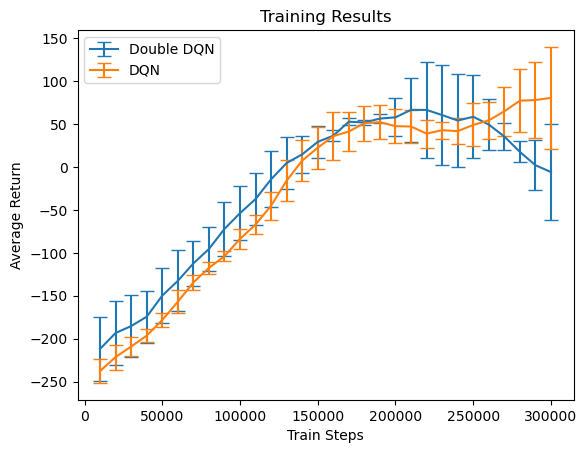

In [5]:
def plot_results(exp, la):
    logdir = os.path.join('data', f"{exp}*", "events*")
    eventfiles = glob.glob(logdir)
    
    Ys = []
    for eventfile in eventfiles:
        X, Y = get_section_results(eventfile)
        Ys.append(Y)
    X = X[1:]
    mean = np.mean(np.array(Ys), axis=0)
    std = np.std(np.array(Ys), axis=0)
    

    plt.errorbar(X, mean, yerr=std, label=la, capsize=5)
    plt.xlabel('Train Steps')
    plt.ylabel('Average Return')
    plt.title(f'Training Results')

plot_results('q1_doubledqn', 'Double DQN')
plot_results('q1_dqn', 'DQN')
plt.legend()
plt.savefig("q1.png")